In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import idx2numpy
import os
import tensorflow.compat.v1 as tf
from matplotlib.ticker import MaxNLocator

tf.disable_v2_behavior()




Instructions for updating:
non-resource variables are not supported in the long term


**Dataset file names**

In [5]:
X_train_name = "train-images-idx3-ubyte"
Y_train_name = "train-labels-idx1-ubyte"
X_test_name = "t10k-images-idx3-ubyte"
Y_test_name = "t10k-labels-idx1-ubyte"

** Sample image and lable from traning set**

In [6]:
X_train  = idx2numpy.convert_from_file(X_train_name)
Y_train  = idx2numpy.convert_from_file(Y_train_name)



SamplePlotX = X_train
SamplePlotY = Y_train


X_test  = idx2numpy.convert_from_file(X_test_name)
Y_test  = idx2numpy.convert_from_file(Y_test_name)


#One hot Encoding
Y_train=pd.get_dummies(Y_train).to_numpy()
Y_test=pd.get_dummies(Y_test).to_numpy()


In [7]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
print(Y_train.shape)
print(X_train.shape)

(60000, 10)
(60000, 28, 28, 1)


In [40]:
backup = X_test
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
print(Y_test.shape)
print(X_test.shape)

(10000, 10)
(10000, 28, 28, 1)


** Visualizing a sample image and the corresponding lable value from the traning dataset **

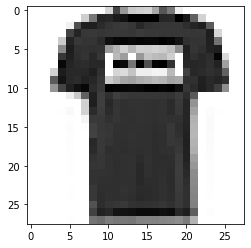

In [8]:
plt.imshow(SamplePlotX[1], cmap = plt.cm.binary)

Visualizing the lables count as per the catogery value

In [9]:
print("Lable for this image is ", Y_train[1])

Lable for this image is  [1 0 0 0 0 0 0 0 0 0]


** Total count of labels category wise **

In [10]:
unique, count = np.unique(SamplePlotY, return_counts=True)
n_classes =  (len(unique))

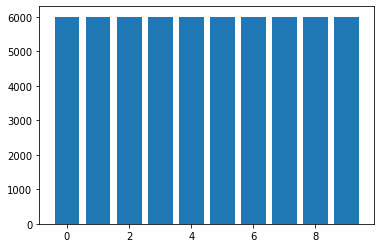

In [11]:
plt.bar(unique,count)
plt.show()

** Parameters **

In [12]:
image_h = image_w = 28
channel = 1

** Batch generation **

In [13]:
def getBatch(batchSize,X,Y):
  global image_h, image_w, channel,totalSample,currentSampleIndex

  
  images = np.empty(shape=[batchSize,image_h,image_w,1], dtype = np.float32 )
  labels = np.empty(shape=[batchSize,10], dtype = np.int32 )

  currentIndex =0

  RandomSample = np.random.permutation(X.shape[0])

  for index in RandomSample:

    #Image normalization 
    _image = X[index]/127.5 -1
    
    images[currentIndex] = _image
    labels[currentIndex] = Y[index]

    currentIndex = currentIndex+1

    if(currentIndex == batchSize):      
      break;

  return images, labels



** Graph parameters **

In [14]:
conv1_filters = 32
conv1_kernelSize  = 3
conv1_stride = 2
conv1_padding = 'SAME'

In [15]:
conv2_filters = 32
conv2_kernelSize  = 3
conv2_stride = 2
conv2_padding = 'SAME'

In [16]:
conv3_filters = 64
conv3_kernelSize  = 3
conv3_stride = 2
conv3_padding = 'SAME'

In [17]:
conv4_filters = 128
conv4_kernelSize  = 3
conv4_stride = 2
conv4_padding = 'SAME'

In [18]:
Dense_1_filters = 512

In [19]:
Dense_2_filters = np.unique(SamplePlotY).size

In [20]:
tf.reset_default_graph()

Placeholers


In [21]:
X = tf.placeholder(tf.float32, shape=[None, image_h,image_w,1], name = "Placeholder_X")
Y = tf.placeholder(tf.int32, shape =[None,n_classes],name = "Placeholder_Y")
DropoutValue1 =  tf.placeholder_with_default(1.0, shape=(),name = "Dropout_1")
DropoutValue2 =  tf.placeholder_with_default(1.0, shape=(),name = "Dropout_2")

print(X)
print(Y)
print(DropoutValue1)
print(DropoutValue2)

Tensor("Placeholder_X:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("Placeholder_Y:0", shape=(?, 10), dtype=int32)
Tensor("Dropout_1:0", shape=(), dtype=float32)
Tensor("Dropout_2:0", shape=(), dtype=float32)


** Graph **

In [22]:
conv1 = tf.layers.conv2d(inputs = X, filters = conv1_filters, kernel_size = conv1_kernelSize, strides = conv1_stride, padding = conv1_padding, activation = tf.nn.relu)

print(conv1)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Tensor("conv2d/Relu:0", shape=(?, 14, 14, 32), dtype=float32)


In [23]:
conv2 = tf.layers.conv2d(inputs = conv1, filters = conv2_filters, kernel_size = conv2_kernelSize, strides = conv2_stride, padding = conv2_padding, activation = tf.nn.relu)

print(conv2)

Tensor("conv2d_1/Relu:0", shape=(?, 7, 7, 32), dtype=float32)


In [24]:
conv3 = tf.layers.conv2d(inputs = conv2, filters = conv3_filters, kernel_size = conv3_kernelSize, strides = conv3_stride, padding = conv3_padding,  activation = tf.nn.relu)

print(conv3)


Tensor("conv2d_2/Relu:0", shape=(?, 4, 4, 64), dtype=float32)


In [25]:
flattenInputShape = conv3.shape
flatten = tf.reshape(conv3, shape = [-1, flattenInputShape[1].value * flattenInputShape[2].value * flattenInputShape[3].value])
print(flatten)

Tensor("Reshape:0", shape=(?, 1024), dtype=float32)


In [26]:
flatten = tf.nn.dropout(flatten,DropoutValue1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
dense1 = tf.layers.dense(inputs = flatten, units = Dense_1_filters, activation= tf.nn.elu)
print(dense1)
dense1 = tf.nn.dropout(dense1,DropoutValue2)

Instructions for updating:
Use keras.layers.Dense instead.
Tensor("dense/Elu:0", shape=(?, 512), dtype=float32)


In [28]:
output = tf.layers.dense(inputs = dense1, units = Dense_2_filters, activation= tf.nn.softmax)
print(output)

Tensor("dense_1/Softmax:0", shape=(?, 10), dtype=float32)


In [29]:
y_pred_cls = tf.argmax(output, axis=1)
y_true_cls = tf.argmax(Y, axis=1)

In [30]:
#loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels= Y, logits = output))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits = output, labels = Y)
cost = tf.reduce_mean(cross_entropy)

In [31]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0007)

In [32]:
train = optimizer.minimize(cost)

In [33]:
saver = tf.train.Saver()

In [34]:
init = tf.global_variables_initializer()

In [35]:
correct_predection = tf.equal(y_pred_cls,y_true_cls)
accuaracy = tf.reduce_mean(tf.cast(correct_predection, tf.float32))

** Hyper parameters **

In [36]:
totalEpocs = 14
batchSize = 64

totalSets =(int)(len(X_train)/batchSize)


totalSets

937

In [37]:
TraningLoss = np.empty(shape= [totalEpocs], dtype= np.float32)
TestLoss = np.empty(shape= [totalEpocs], dtype= np.float32)

In [43]:
with tf.Session() as sess:
  sess.run(init)

  for epoch in range(totalEpocs):


    print("{0}. Epoch".format(epoch+1))

    _accTotal = 0 
    


    for index in range(totalSets):
      _x,_y = getBatch(batchSize, X_train,Y_train)     
    
      sess.run(train, feed_dict = {X:_x,Y:_y,DropoutValue1:0.75, DropoutValue2:.75})


      _acc =  sess.run(accuaracy, feed_dict = {X:_x,Y:_y,DropoutValue1:0.75, DropoutValue2:.75})

      _accTotal = _accTotal + _acc

     # _cost = sess.run(cost, feed_dict = {X:_x,Y:_y})

     
  
      if index % 400==0:
        print('        Set No = {0} and accuracy = {1}'.format(index,_acc))

    overallAcc = _accTotal/totalSets

    print('  Overall Accuracy for epoc {0} and is  {1}'.format(epoch,overallAcc))
  
    TraningLoss[epoch] = overallAcc

    _x,_y = getBatch(batchSize, X_train,Y_train)         
   
    _acc = sess.run(accuaracy, feed_dict = {X:_x,Y:_y,DropoutValue1:1, DropoutValue2:1})

    #_cost = sess.run(cost, feed_dict = {X:_x,Y:_y})

    print('  Accuracy for Test Run for epoc {0} is  {1} '.format(epoch,_acc))

    TestLoss[epoch] = _acc

     



1. Epoch
        Set No = 0 and accuracy = 0.1875
        Set No = 400 and accuracy = 0.8125
        Set No = 800 and accuracy = 0.859375
  Overall Accuracy for epoc 0 and is  0.787870197438634
  Accuracy for Test Run for epoc 0 is  0.8125 
2. Epoch
        Set No = 0 and accuracy = 0.890625
        Set No = 400 and accuracy = 0.859375
        Set No = 800 and accuracy = 0.90625
  Overall Accuracy for epoc 1 and is  0.8553395144076841
  Accuracy for Test Run for epoc 1 is  0.890625 
3. Epoch
        Set No = 0 and accuracy = 0.90625
        Set No = 400 and accuracy = 0.8125
        Set No = 800 and accuracy = 0.875
  Overall Accuracy for epoc 2 and is  0.8707644076840982
  Accuracy for Test Run for epoc 2 is  0.875 
4. Epoch
        Set No = 0 and accuracy = 0.890625
        Set No = 400 and accuracy = 0.890625
        Set No = 800 and accuracy = 0.828125
  Overall Accuracy for epoc 3 and is  0.8807030416221985
  Accuracy for Test Run for epoc 3 is  0.9375 
5. Epoch
        Set No = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


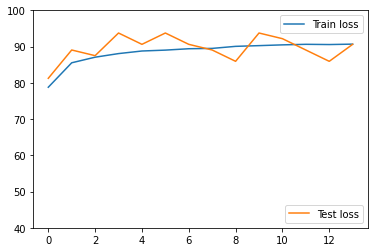

In [49]:

trainLossValues = TraningLoss*100 
testLossValues =  TestLoss  * 100 
line1, = plt.plot(trainLossValues, label ='Train loss')
line2, = plt.plot(testLossValues, label ='Test loss')

first_legend = plt.legend(handles=[line1], loc =1)

ax = plt.gca().add_artist(first_legend)

plt.legend(handles=[line2], loc =4)

axes = plt.axes()
axes.set_ylim([40, 100])


plt.show()